# India Rainfall Analysis
## Dataset
- Dataset1([dataset1](https://data.gov.in/resources/district-rainfall-normal-mm-monthly-seasonal-and-annual-data-period-1951-2000)) 
  This dataset has average rainfall from 1951-2000 for each district, for every month.
- Dataset2([dataset2](https://data.gov.in/resources/subdivision-wise-rainfall-and-its-departure-1901-2015)) 
  This dataset has average rainfall for every year from 1901-2015 for each state


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## Types of graphs
- Bar graphs showing distribution of amount of rainfall.
- Distribution of amount of rainfall yearly, monthly, groups of months.
- Distribution of rainfall in subdivisions, districts form each month, groups of months.
- Heat maps showing correlation between amount of rainfall between months.


In [2]:
data = pd.read_csv("../input/dataset/rainfall_in_india_1901-2015.csv",sep=",")
data = data.fillna(data.mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4116 non-null   float64
 3   FEB          4116 non-null   float64
 4   MAR          4116 non-null   float64
 5   APR          4116 non-null   float64
 6   MAY          4116 non-null   float64
 7   JUN          4116 non-null   float64
 8   JUL          4116 non-null   float64
 9   AUG          4116 non-null   float64
 10  SEP          4116 non-null   float64
 11  OCT          4116 non-null   float64
 12  NOV          4116 non-null   float64
 13  DEC          4116 non-null   float64
 14  ANNUAL       4116 non-null   float64
 15  Jan-Feb      4116 non-null   float64
 16  Mar-May      4116 non-null   float64
 17  Jun-Sep      4116 non-null   float64
 18  Oct-Dec      4116 non-null   float64
dtypes: flo

In [3]:
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [4]:
data.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000
mean,1958.218659,18.957320,21.805325,27.359197,43.127432,85.745417,230.234444,347.214334,290.263497,197.361922,95.507009,39.866163,18.870580,1411.008900,40.747786,155.901753,1064.724769,154.100487
std,33.140898,33.569044,35.896396,46.925176,67.798192,123.189974,234.568120,269.310313,188.678707,135.309591,99.434452,68.593545,42.318098,900.986632,59.265023,201.096692,706.881054,166.678751
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.300000,0.000000,0.000000,57.400000,0.000000
25%,1930.000000,0.600000,0.600000,1.000000,3.000000,8.600000,70.475000,175.900000,156.150000,100.600000,14.600000,0.700000,0.100000,806.450000,4.100000,24.200000,574.375000,34.200000
50%,1958.000000,6.000000,6.700000,7.900000,15.700000,36.700000,138.900000,284.900000,259.500000,174.100000,65.750000,9.700000,3.100000,1125.450000,19.300000,75.200000,882.250000,98.800000
75%,1987.000000,22.125000,26.800000,31.225000,49.825000,96.825000,304.950000,418.225000,377.725000,265.725000,148.300000,45.825000,17.700000,1635.100000,50.300000,196.900000,1287.550000,212.600000
max,2015.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


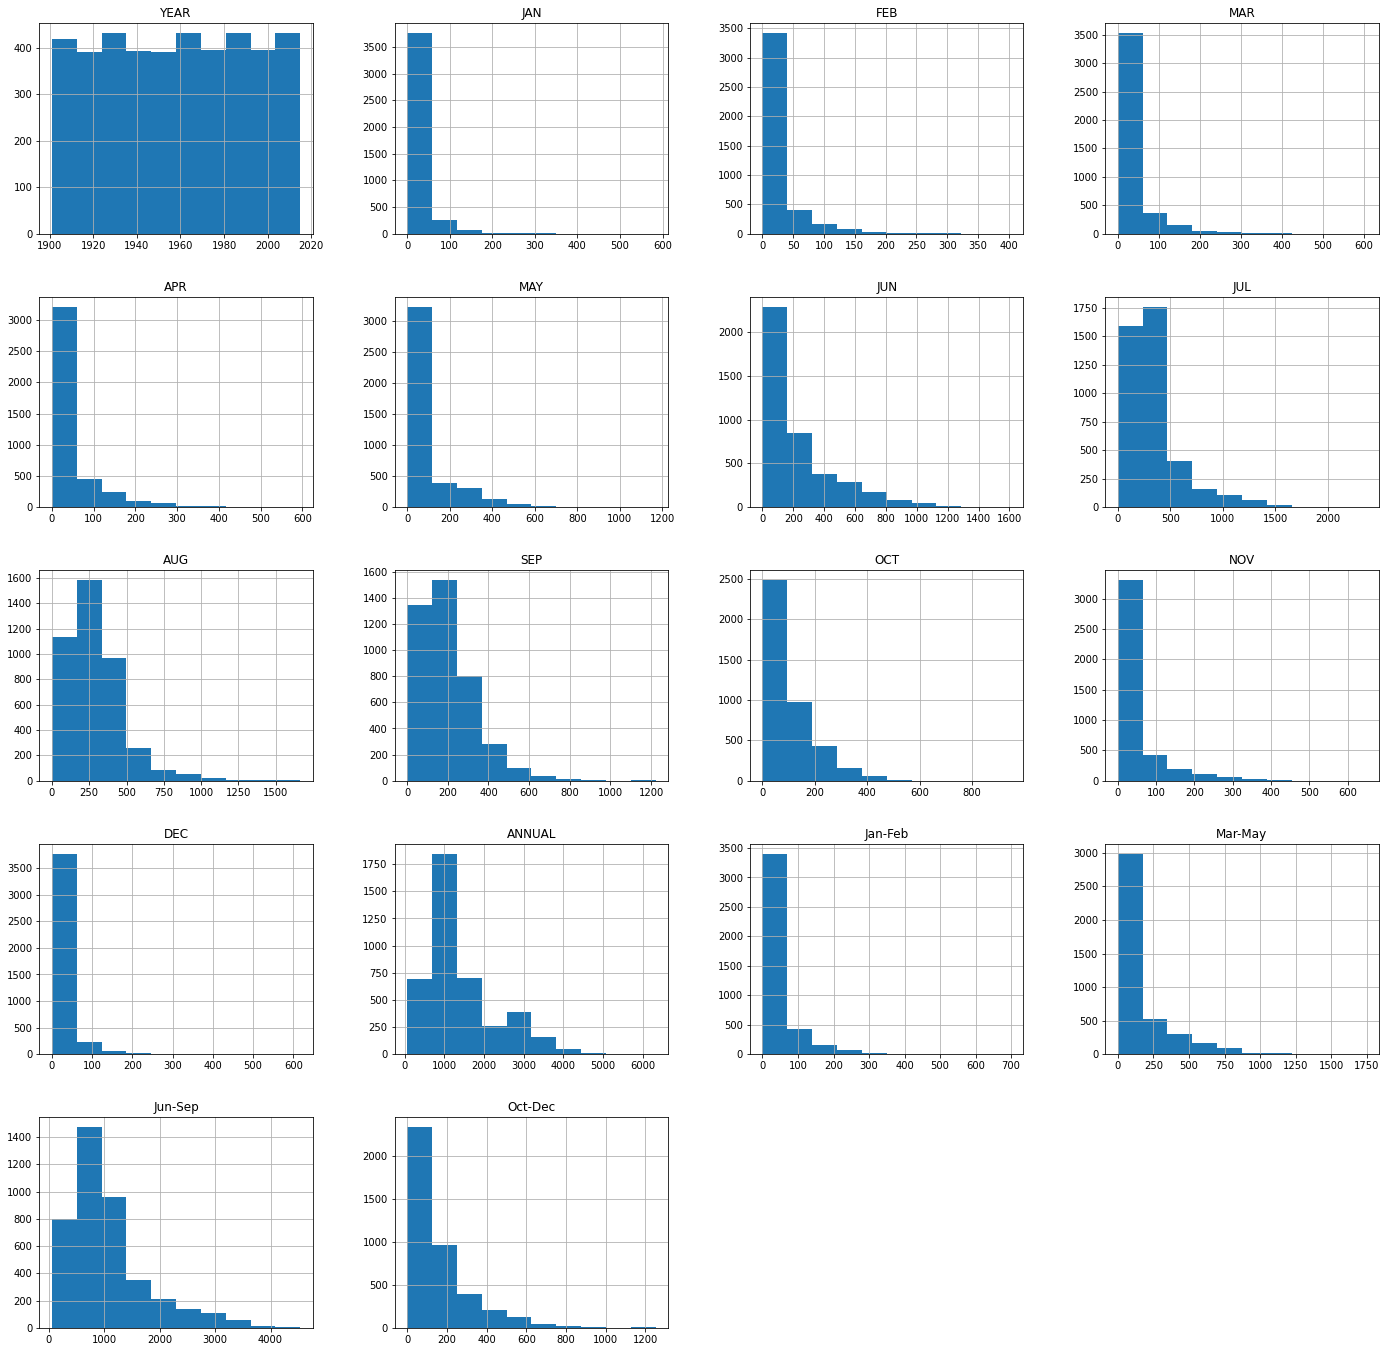

In [5]:
data.hist(figsize=(24,24));

## Observations
- Above histograms show the distribution of rainfall over months.
- Observed increase in amount of rainfall over months July, August, September.

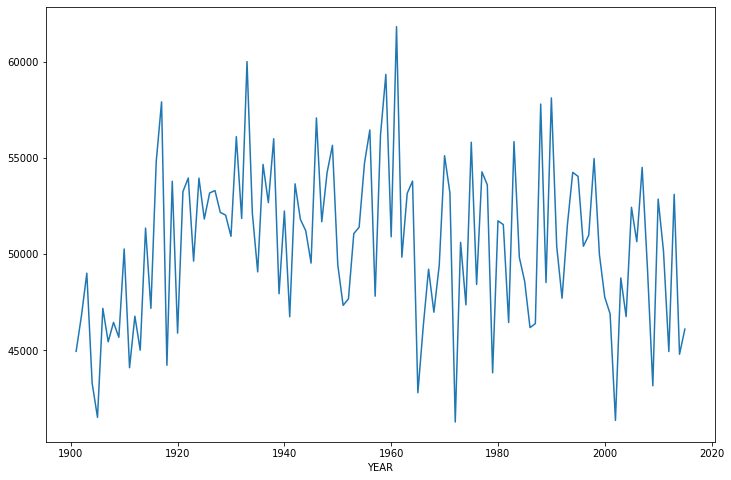

In [6]:
data.groupby("YEAR").sum()['ANNUAL'].plot(figsize=(12,8));

## Observations
- Shows distribution of rainfall over years. 
- Observed high amount of rainfall in 1950s.

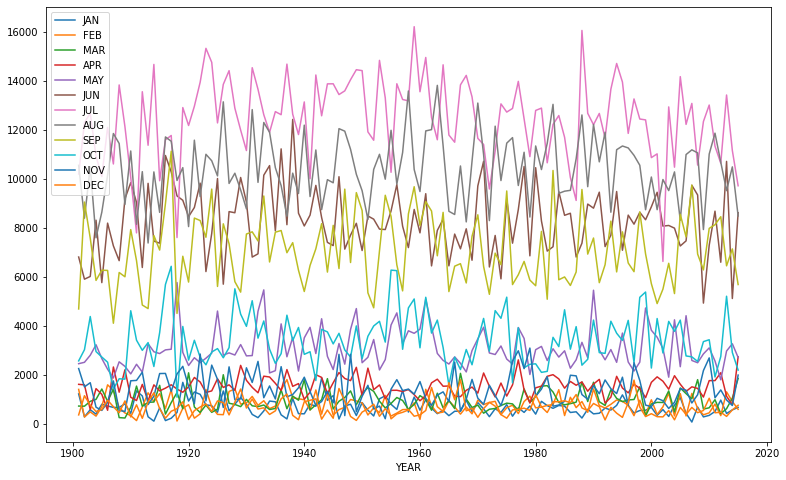

In [7]:
data[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("YEAR").sum().plot(figsize=(13,8));

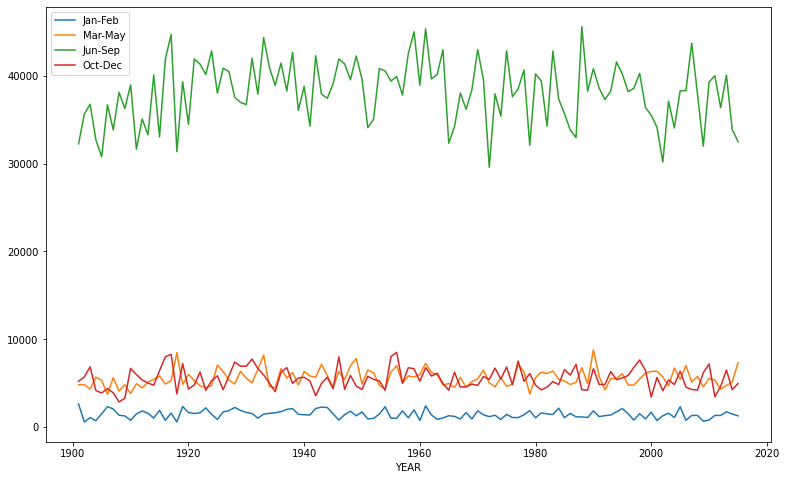

In [8]:
data[['YEAR','Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec']].groupby("YEAR").sum().plot(figsize=(13,8));

## Observations
- The above two graphs show the distribution of rainfall over months.
- The graphs clearly shows that amount of rainfall in high in the months july, aug, sep which is monsoon season in India.

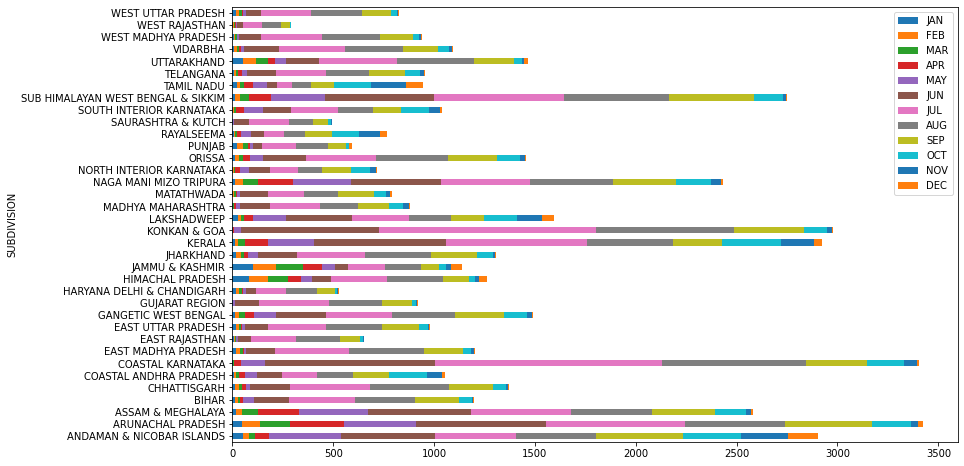

In [9]:
data[['SUBDIVISION', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("SUBDIVISION").mean().plot.barh(stacked=True,figsize=(13,8));

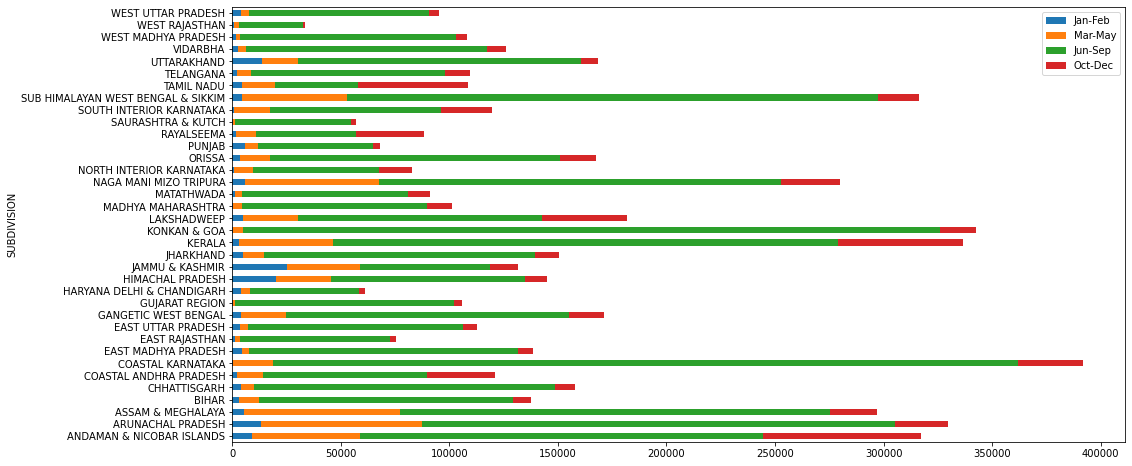

In [10]:
data[['SUBDIVISION', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec']].groupby("SUBDIVISION").sum().plot.barh(stacked=True,figsize=(16,8));

## Observations
- Above two graphs shows that the amount of rainfall is reasonably good in the months of march, april, may in eastern India. 

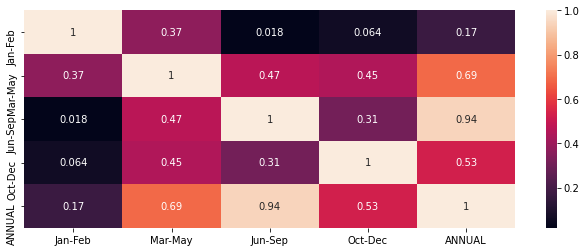

In [11]:
plt.figure(figsize=(11,4))
sns.heatmap(data[['Jan-Feb','Mar-May','Jun-Sep','Oct-Dec','ANNUAL']].corr(),annot=True)
plt.show()

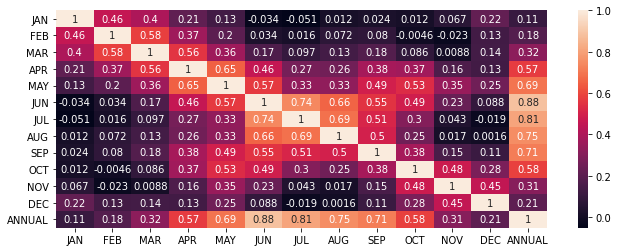

In [12]:
plt.figure(figsize=(11,4))
sns.heatmap(data[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','ANNUAL']].corr(),annot=True)
plt.show()

## Observations
- **Heat Map** shows the co-relation(dependency) betwenn the amounts of rainfall over months.
- From above it is clear that if amount of rainfall is high in the months of july, august, september then the amount of rainfall will be high annually.
- It is also obwserved that if amount of rainfall in good in the months of october, november, december then the rainfall is going to b good in the overall year. 

In [14]:
#Function to plot the graphs
def plot_graphs(groundtruth,prediction,title):        
    N = 9
    ind = np.arange(N)  # the x locations for the groups
    width = 0.27       # the width of the bars

    fig = plt.figure()
    fig.suptitle(title, fontsize=12)
    ax = fig.add_subplot(111)
    rects1 = ax.bar(ind, groundtruth, width, color='r')
    rects2 = ax.bar(ind+width, prediction, width, color='g')

    ax.set_ylabel("Amount of rainfall")
    ax.set_xticks(ind+width)
    ax.set_xticklabels( ('APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP', 'OCT', 'NOV', 'DEC') )
    ax.legend( (rects1[0], rects2[0]), ('Ground truth', 'Prediction') )

#     autolabel(rects1)
    for rect in rects1:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')
    for rect in rects2:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')
#     autolabel(rects2)

    plt.show()

## Predictions
- For prediction data is formatted in the way, given the rainfall in the last three months we try to predict the rainfall in the next consecutive month.
- For all the experiments we used 80:20 training and test ratio.
    - Linear regression
    - SVR
    - Artificial neural nets
- Tersting metrics: We used Mean absolute error to train the models.
- The amount of rainfall actually and predicted with the histogram plots is also shown.
- Two types of trainings are carried out once training on complete dataset and other with training with only telangana data
- All means are standard deviation observations are written, first one represents ground truth, second one represents predictions.


In [15]:
# seperation of training and testing data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

division_data = np.asarray(data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']])

X = None; y = None
for i in range(division_data.shape[1]-3):
    if X is None:
        X = division_data[:, i:i+3]
        y = division_data[:, i+3]
    else:
        X = np.concatenate((X, division_data[:, i:i+3]), axis=0)
        y = np.concatenate((y, division_data[:, i+3]), axis=0)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [16]:
#test 2010
temp = data[['SUBDIVISION','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[data['YEAR'] == 2010]

data_2010 = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[temp['SUBDIVISION'] == 'TELANGANA'])

X_year_2010 = None; y_year_2010 = None
for i in range(data_2010.shape[1]-3):
    if X_year_2010 is None:
        X_year_2010 = data_2010[:, i:i+3]
        y_year_2010 = data_2010[:, i+3]
    else:
        X_year_2010 = np.concatenate((X_year_2010, data_2010[:, i:i+3]), axis=0)
        y_year_2010 = np.concatenate((y_year_2010, data_2010[:, i+3]), axis=0)


In [17]:
#test 2005
temp = data[['SUBDIVISION','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[data['YEAR'] == 2005]

data_2005 = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[temp['SUBDIVISION'] == 'TELANGANA'])

X_year_2005 = None; y_year_2005 = None
for i in range(data_2005.shape[1]-3):
    if X_year_2005 is None:
        X_year_2005 = data_2005[:, i:i+3]
        y_year_2005 = data_2005[:, i+3]
    else:
        X_year_2005 = np.concatenate((X_year_2005, data_2005[:, i:i+3]), axis=0)
        y_year_2005 = np.concatenate((y_year_2005, data_2005[:, i+3]), axis=0)


In [18]:
#terst 2015
temp = data[['SUBDIVISION','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[data['YEAR'] == 2015]

data_2015 = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[temp['SUBDIVISION'] == 'TELANGANA'])

X_year_2015 = None; y_year_2015 = None
for i in range(data_2015.shape[1]-3):
    if X_year_2015 is None:
        X_year_2015 = data_2015[:, i:i+3]
        y_year_2015 = data_2015[:, i+3]
    else:
        X_year_2015 = np.concatenate((X_year_2015, data_2015[:, i:i+3]), axis=0)
        y_year_2015 = np.concatenate((y_year_2015, data_2015[:, i+3]), axis=0)


In [20]:
from sklearn import linear_model

# linear model
reg = linear_model.ElasticNet(alpha=0.5)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print (mean_absolute_error(y_test, y_pred))

96.32435229744083


MEAN 2005
121.2111111111111 134.68699821349804
Standard deviation 2005
123.77066107608005 90.8631023041644
MEAN 2010
139.93333333333334 144.80501326515912
Standard deviation 2010
135.71320250194282 95.94931363601725
MEAN 2015
88.52222222222223 119.64752006738829
Standard deviation 2015
86.62446123324875 62.36355370163373


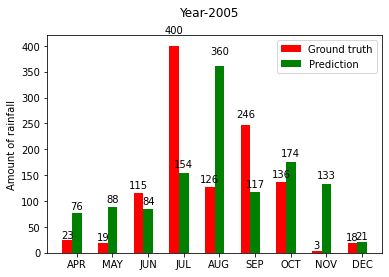

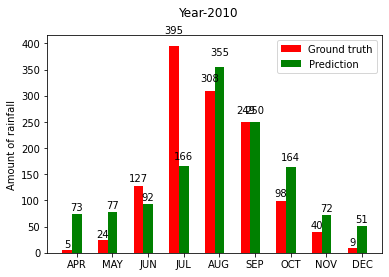

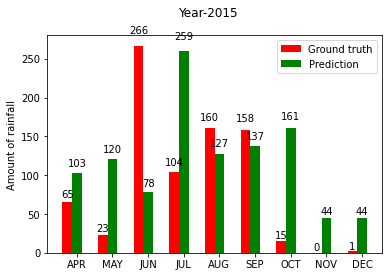

In [21]:

#2005
y_year_pred_2005 = reg.predict(X_year_2005)


#2010
y_year_pred_2010 = reg.predict(X_year_2010)
    
y_year_pred_2015 = reg.predict(X_year_2015)

print ("MEAN 2005")
print (np.mean(y_year_2005),np.mean(y_year_pred_2005))
print ("Standard deviation 2005")
print (np.sqrt(np.var(y_year_2005)),np.sqrt(np.var(y_year_pred_2005)))


print ("MEAN 2010")
print (np.mean(y_year_2010),np.mean(y_year_pred_2010))
print ("Standard deviation 2010")
print (np.sqrt(np.var(y_year_2010)),np.sqrt(np.var(y_year_pred_2010)))


print ("MEAN 2015")
print (np.mean(y_year_2015),np.mean(y_year_pred_2015))
print ("Standard deviation 2015")
print (np.sqrt(np.var(y_year_2015)),np.sqrt(np.var(y_year_pred_2015)))


plot_graphs(y_year_2005,y_year_pred_2005,"Year-2005")
plot_graphs(y_year_2010,y_year_pred_2010,"Year-2010")
plot_graphs(y_year_2015,y_year_pred_2015,"Year-2015")

In [22]:
from sklearn.svm import SVR

# SVM model
clf = SVR(gamma='auto', C=0.1, epsilon=0.2)
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)
print (mean_absolute_error(y_test, y_pred))

127.1600615632603


MEAN 2005
121.2111111111111 134.68699821349804
Standard deviation 2005
123.77066107608005 90.8631023041644
MEAN 2010
139.93333333333334 144.80501326515912
Standard deviation 2010
135.71320250194282 95.94931363601725
MEAN 2015
88.52222222222223 119.64752006738829
Standard deviation 2015
86.62446123324875 62.36355370163373


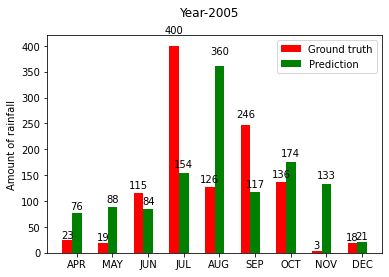

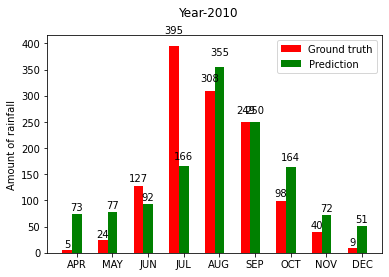

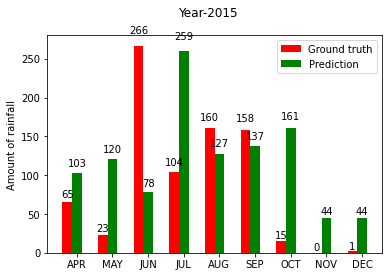

In [23]:
#2005
y_year_pred_2005 = reg.predict(X_year_2005)

#2010
y_year_pred_2010 = reg.predict(X_year_2010)
    
#2015
y_year_pred_2015 = reg.predict(X_year_2015)
print ("MEAN 2005")
print (np.mean(y_year_2005),np.mean(y_year_pred_2005))
print ("Standard deviation 2005")
print (np.sqrt(np.var(y_year_2005)),np.sqrt(np.var(y_year_pred_2005)))


print ("MEAN 2010")
print (np.mean(y_year_2010),np.mean(y_year_pred_2010))
print ("Standard deviation 2010")
print (np.sqrt(np.var(y_year_2010)),np.sqrt(np.var(y_year_pred_2010)))


print ("MEAN 2015")
print (np.mean(y_year_2015),np.mean(y_year_pred_2015))
print ("Standard deviation 2015")
print (np.sqrt(np.var(y_year_2015)),np.sqrt(np.var(y_year_pred_2015)))

plot_graphs(y_year_2005,y_year_pred_2005,"Year-2005")
plot_graphs(y_year_2010,y_year_pred_2010,"Year-2010")
plot_graphs(y_year_2015,y_year_pred_2015,"Year-2015")

In [24]:
from keras.models import Model
from keras.layers import Dense, Input, Conv1D, Flatten

# NN model
inputs = Input(shape=(3,1))
x = Conv1D(64, 2, padding='same', activation='elu')(inputs)
x = Conv1D(128, 2, padding='same', activation='elu')(x)
x = Flatten()(x)
x = Dense(128, activation='elu')(x)
x = Dense(64, activation='elu')(x)
x = Dense(32, activation='elu')(x)
x = Dense(1, activation='linear')(x)
model = Model(inputs=[inputs], outputs=[x])
model.compile(loss='mean_squared_error', optimizer='adamax', metrics=['mae'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3, 1)]            0         
_________________________________________________________________
conv1d (Conv1D)              (None, 3, 64)             192       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 3, 128)            16512     
_________________________________________________________________
flatten (Flatten)            (None, 384)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               49280     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080  

In [25]:
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.1, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

Epoch 1/10
469/469 [==============================] - 4s 6ms/step - loss: 21705.0446 - mae: 90.7019 - val_loss: 17657.5488 - val_mae: 83.6594
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 18231.7531 - mae: 86.1217 - val_loss: 17805.0430 - val_mae: 83.4887
Epoch 3/10
469/469 [==============================] - 3s 5ms/step - loss: 18121.1924 - mae: 86.3609 - val_loss: 17404.7812 - val_mae: 85.1680
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 17841.1586 - mae: 85.2429 - val_loss: 17444.5098 - val_mae: 86.4772
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 18634.3039 - mae: 85.7480 - val_loss: 17411.3848 - val_mae: 85.7151
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 18590.0996 - mae: 85.7449 - val_loss: 17312.9395 - val_mae: 83.3236
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 18148.5915 - mae: 85.5636 - val_loss: 17241.9395 - val_mae: 83.8669
Epoch 

MEAN 2005
121.2111111111111 134.68699821349804
Standard deviation 2005
123.77066107608005 90.8631023041644
MEAN 2010
139.93333333333334 144.80501326515912
Standard deviation 2010
135.71320250194282 95.94931363601725
MEAN 2015
88.52222222222223 119.64752006738829
Standard deviation 2015
86.62446123324875 62.36355370163373


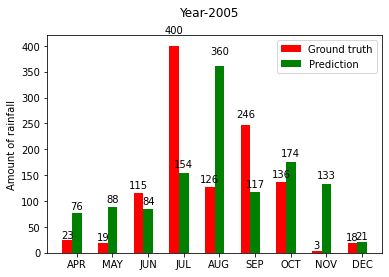

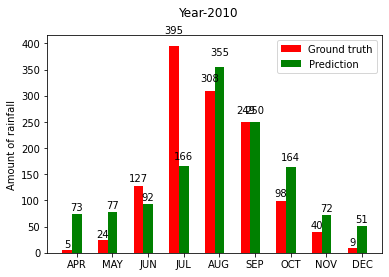

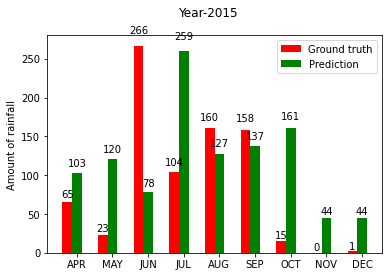

In [26]:
#2005
y_year_pred_2005 = reg.predict(X_year_2005)

#2010
y_year_pred_2010 = reg.predict(X_year_2010)
    
#2015
y_year_pred_2015 = reg.predict(X_year_2015)

print ("MEAN 2005")
print (np.mean(y_year_2005),np.mean(y_year_pred_2005))
print ("Standard deviation 2005")
print (np.sqrt(np.var(y_year_2005)),np.sqrt(np.var(y_year_pred_2005)))


print ("MEAN 2010")
print (np.mean(y_year_2010),np.mean(y_year_pred_2010))
print ("Standard deviation 2010")
print (np.sqrt(np.var(y_year_2010)),np.sqrt(np.var(y_year_pred_2010)))


print ("MEAN 2015")
print (np.mean(y_year_2015),np.mean(y_year_pred_2015))
print ("Standard deviation 2015")
print (np.sqrt(np.var(y_year_2015)),np.sqrt(np.var(y_year_pred_2015)))

plot_graphs(y_year_2005,y_year_pred_2005,"Year-2005")
plot_graphs(y_year_2010,y_year_pred_2010,"Year-2010")
plot_graphs(y_year_2015,y_year_pred_2015,"Year-2015")

In [27]:
# spliting training and testing data only for telangana
telangana = np.asarray(data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[data['SUBDIVISION'] == 'TELANGANA'])

X = None; y = None
for i in range(telangana.shape[1]-3):
    if X is None:
        X = telangana[:, i:i+3]
        y = telangana[:, i+3]
    else:
        X = np.concatenate((X, telangana[:, i:i+3]), axis=0)
        y = np.concatenate((y, telangana[:, i+3]), axis=0)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)        

In [28]:
from sklearn import linear_model

# linear model
reg = linear_model.ElasticNet(alpha=0.5)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print(mean_absolute_error(y_test, y_pred))

64.72601914484643


MEAN 2005
121.2111111111111 106.49798150231584
Standard deviation 2005
123.77066107608005 76.08558540019236
MEAN 2010
139.93333333333334 112.18662987131034
Standard deviation 2010
135.71320250194282 84.35813629737333
MEAN 2015
88.52222222222223 96.76817006572782
Standard deviation 2015
86.62446123324875 52.45304841713268


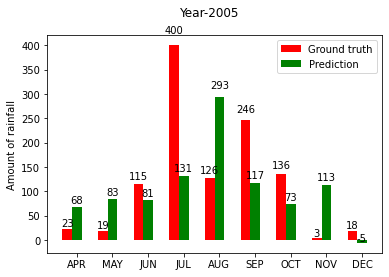

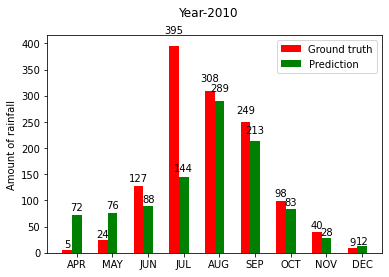

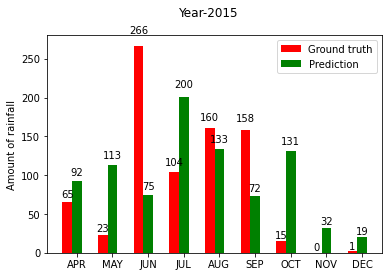

In [30]:
#2005
y_year_pred_2005 = reg.predict(X_year_2005)

#2010
y_year_pred_2010 = reg.predict(X_year_2010)
    
#2015
y_year_pred_2015 = reg.predict(X_year_2015)

print ("MEAN 2005")
print (np.mean(y_year_2005),np.mean(y_year_pred_2005))
print ("Standard deviation 2005")
print (np.sqrt(np.var(y_year_2005)),np.sqrt(np.var(y_year_pred_2005)))


print ("MEAN 2010")
print (np.mean(y_year_2010),np.mean(y_year_pred_2010))
print ("Standard deviation 2010")
print (np.sqrt(np.var(y_year_2010)),np.sqrt(np.var(y_year_pred_2010)))


print ("MEAN 2015")
print (np.mean(y_year_2015),np.mean(y_year_pred_2015))
print ("Standard deviation 2015")
print (np.sqrt(np.var(y_year_2015)),np.sqrt(np.var(y_year_pred_2015)))

plot_graphs(y_year_2005,y_year_pred_2005,"Year-2005")
plot_graphs(y_year_2010,y_year_pred_2010,"Year-2010")
plot_graphs(y_year_2015,y_year_pred_2015,"Year-2015")

In [31]:
from sklearn.svm import SVR

# SVM model
clf = SVR(kernel='rbf', gamma='auto', C=0.5, epsilon=0.2)
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)
print(mean_absolute_error(y_test, y_pred))

115.32415990638656


MEAN 2005
121.2111111111111 106.49798150231584
Standard deviation 2005
123.77066107608005 76.08558540019236
MEAN 2010
139.93333333333334 112.18662987131034
Standard deviation 2010
135.71320250194282 84.35813629737333
MEAN 2015
88.52222222222223 96.76817006572782
Standard deviation 2015
86.62446123324875 52.45304841713268


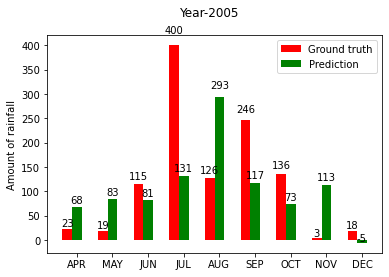

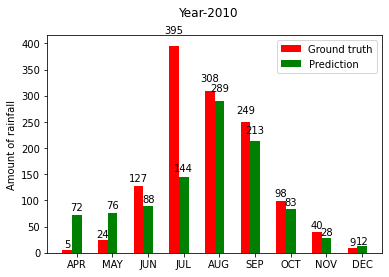

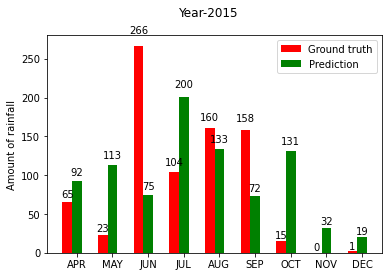

In [32]:
#2005
y_year_pred_2005 = reg.predict(X_year_2005)

#2010
y_year_pred_2010 = reg.predict(X_year_2010)
    
#2015
y_year_pred_2015 = reg.predict(X_year_2015)

print ("MEAN 2005")
print (np.mean(y_year_2005),np.mean(y_year_pred_2005))
print ("Standard deviation 2005")
print (np.sqrt(np.var(y_year_2005)),np.sqrt(np.var(y_year_pred_2005)))


print ("MEAN 2010")
print (np.mean(y_year_2010),np.mean(y_year_pred_2010))
print ("Standard deviation 2010")
print (np.sqrt(np.var(y_year_2010)),np.sqrt(np.var(y_year_pred_2010)))


print ("MEAN 2015")
print (np.mean(y_year_2015),np.mean(y_year_pred_2015))
print ("Standard deviation 2015")
print (np.sqrt(np.var(y_year_2015)),np.sqrt(np.var(y_year_pred_2015)))

plot_graphs(y_year_2005,y_year_pred_2005,"Year-2005")
plot_graphs(y_year_2010,y_year_pred_2010,"Year-2010")
plot_graphs(y_year_2015,y_year_pred_2015,"Year-2015")

In [33]:
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.1, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print (mean_absolute_error(y_test, y_pred))

Epoch 1/10
15/15 [==============================] - 0s 14ms/step - loss: 6919.5356 - mae: 63.1123 - val_loss: 4871.1333 - val_mae: 51.5480
Epoch 2/10
15/15 [==============================] - 0s 9ms/step - loss: 6265.1616 - mae: 56.7335 - val_loss: 4680.7236 - val_mae: 50.5255
Epoch 3/10
15/15 [==============================] - 0s 9ms/step - loss: 6072.1294 - mae: 56.7685 - val_loss: 4603.8638 - val_mae: 50.8680
Epoch 4/10
15/15 [==============================] - 0s 10ms/step - loss: 5991.9209 - mae: 57.5211 - val_loss: 4575.3179 - val_mae: 50.8223
Epoch 5/10
15/15 [==============================] - 0s 9ms/step - loss: 5940.7090 - mae: 56.4247 - val_loss: 4505.2109 - val_mae: 49.8598
Epoch 6/10
15/15 [==============================] - 0s 10ms/step - loss: 5910.5020 - mae: 56.8593 - val_loss: 4513.8042 - val_mae: 50.4081
Epoch 7/10
15/15 [==============================] - 0s 9ms/step - loss: 5841.9072 - mae: 55.7676 - val_loss: 4421.9917 - val_mae: 49.1153
Epoch 8/10
15/15 [=============

MEAN 2005
121.2111111111111 106.49798150231584
Standard deviation 2005
123.77066107608005 76.08558540019236
MEAN 2010
139.93333333333334 112.18662987131034
Standard deviation 2010
135.71320250194282 84.35813629737333
MEAN 2015
88.52222222222223 96.76817006572782
Standard deviation 2015
86.62446123324875 52.45304841713268


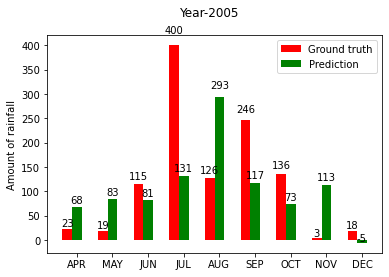

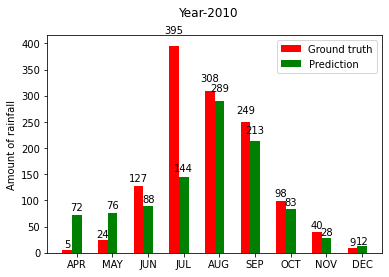

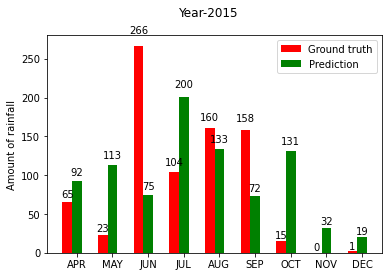

In [35]:
#2005
y_year_pred_2005 = reg.predict(X_year_2005)

#2010
y_year_pred_2010 = reg.predict(X_year_2010)
    
#2015
y_year_pred_2015 = reg.predict(X_year_2015)

print ("MEAN 2005")
print (np.mean(y_year_2005),np.mean(y_year_pred_2005))
print ("Standard deviation 2005")
print (np.sqrt(np.var(y_year_2005)),np.sqrt(np.var(y_year_pred_2005)))


print ("MEAN 2010")
print (np.mean(y_year_2010),np.mean(y_year_pred_2010))
print ("Standard deviation 2010")
print (np.sqrt(np.var(y_year_2010)),np.sqrt(np.var(y_year_pred_2010)))


print ("MEAN 2015")
print (np.mean(y_year_2015),np.mean(y_year_pred_2015))
print ("Standard deviation 2015")
print (np.sqrt(np.var(y_year_2015)),np.sqrt(np.var(y_year_pred_2015)))

plot_graphs(y_year_2005,y_year_pred_2005,"Year-2005")
plot_graphs(y_year_2010,y_year_pred_2010,"Year-2010")
plot_graphs(y_year_2015,y_year_pred_2015,"Year-2015")

## Prediction Observations

### Training on complete dataset

|Algorithm|MAE|
|---------|---|
|Linear Regression|94.94821727619338|
|SVR|127.74073860203839|
|Artificial neural nets|85.2648713528865|

### Training on telangana dataset

|Algorithm| MAE|
|---------|----|
|Linear Regression| 70.61463829282977|
|SVR| 90.30526775954294|
|Artificial neural nets |59.95190786532157|

- Neural Networks performs better than SVR etc.
- Observed MAE is very high which indicates machine learning models won't work well for prediction of rainfall.
- Telangana data has a single pattern that can be learned by models, rather than learning different patterns of all states. so has high accuracy.
- Analysed individual year rainfall patterns for 2005, 2010, 2015.
- Approximately close means, noticed less standard deviations.

## District wise details
- Similar to above the number of attributes is same, we don’t have year in this.
- The amount of rainfall in mm for each district is added from 1950-2000.
- We analyse the data individually for the state **Tamil Nadu**


In [36]:
district = pd.read_csv("../input/dataset/district_wise_rainfall_normal.csv",sep=",")
district = district.fillna(district.mean())
district.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   STATE_UT_NAME  641 non-null    object 
 1   DISTRICT       641 non-null    object 
 2   JAN            641 non-null    float64
 3   FEB            641 non-null    float64
 4   MAR            641 non-null    float64
 5   APR            641 non-null    float64
 6   MAY            641 non-null    float64
 7   JUN            641 non-null    float64
 8   JUL            641 non-null    float64
 9   AUG            641 non-null    float64
 10  SEP            641 non-null    float64
 11  OCT            641 non-null    float64
 12  NOV            641 non-null    float64
 13  DEC            641 non-null    float64
 14  ANNUAL         641 non-null    float64
 15  Jan-Feb        641 non-null    float64
 16  Mar-May        641 non-null    float64
 17  Jun-Sep        641 non-null    float64
 18  Oct-Dec   

In [37]:
district.head()

,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN And NICOBAR ISLANDS,NICOBAR,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9,2805.2,165.2,540.7,1207.2,892.1
1,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3,3015.7,69.7,483.5,1757.2,705.3
2,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,454.8,276.1,198.6,100.0,2913.3,48.6,405.6,1884.4,574.7
3,ARUNACHAL PRADESH,LOHIT,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,313.6,167.1,34.1,29.8,3043.8,123.0,841.3,1848.5,231.0
4,ARUNACHAL PRADESH,EAST SIANG,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,568.0,206.9,29.5,31.7,4034.7,112.8,645.4,3008.4,268.1


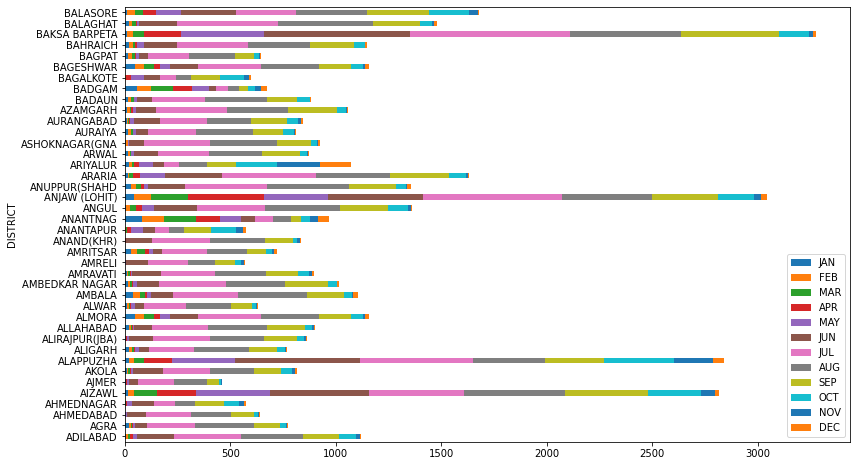

In [38]:
district[['DISTRICT', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("DISTRICT").mean()[:40].plot.barh(stacked=True,figsize=(13,8));

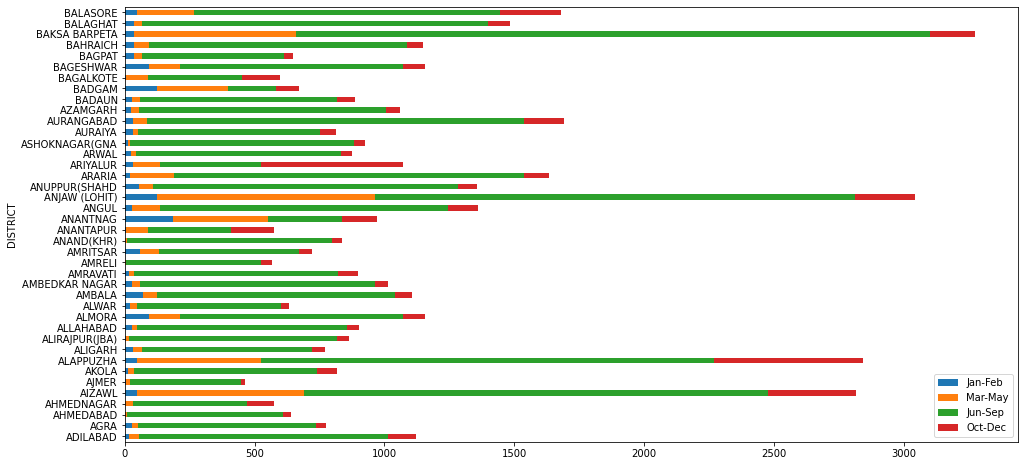

In [39]:
district[['DISTRICT', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec']].groupby("DISTRICT").sum()[:40].plot.barh(stacked=True,figsize=(16,8));

## Observations
- The above two graphs shows the distribution of over each district.
- As there are large number of districts only 40 were shown in the graphs.

**Andhra Pradesh Data**

In [40]:
ap_data = district[district['STATE_UT_NAME'] == 'TAMIL NADU']

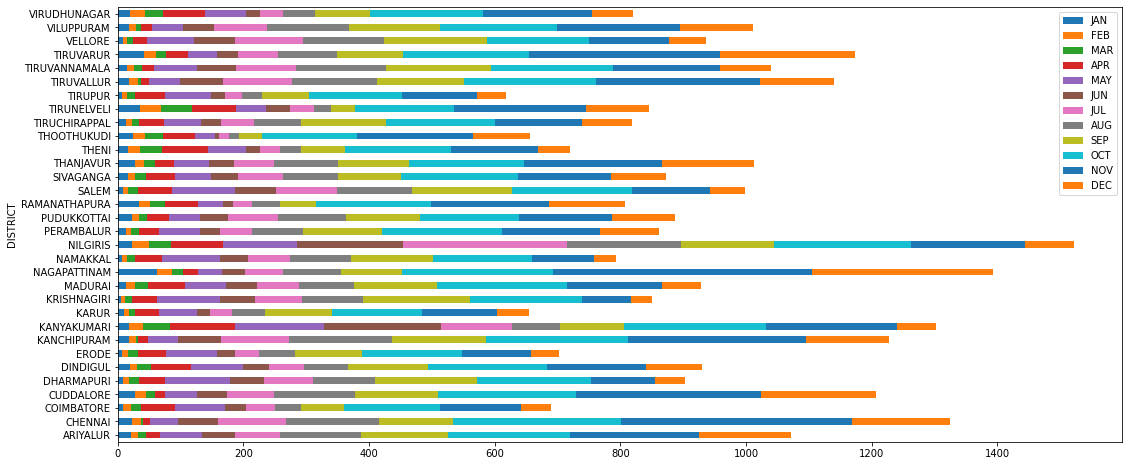

In [41]:
ap_data[['DISTRICT', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("DISTRICT").mean()[:40].plot.barh(stacked=True,figsize=(18,8));

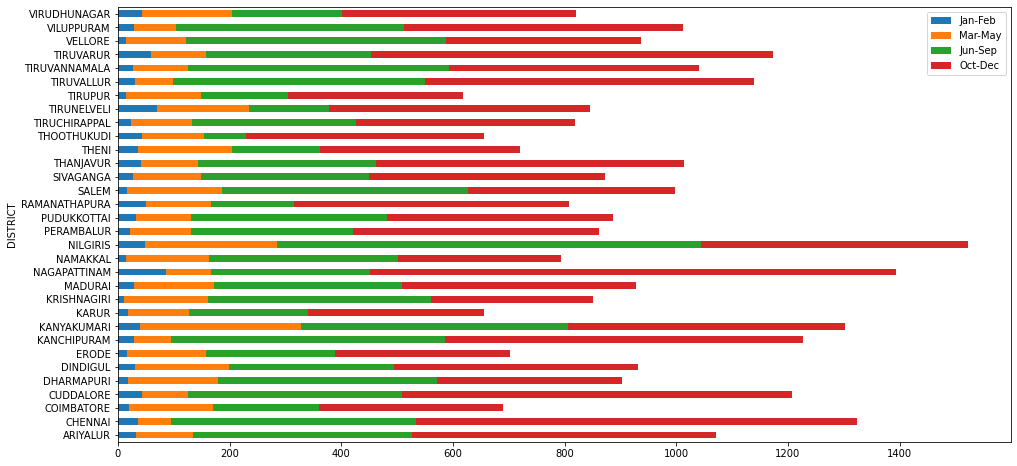

In [42]:
ap_data[['DISTRICT', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec']].groupby("DISTRICT").sum()[:40].plot.barh(stacked=True,figsize=(16,8));

## Observations
- The above two graphs shows the distribution of over each district in **Tamil Nadu**.
- The above graphs show that more amount of rainfall is found in perambalur district, least amount of rainfall is found in Tirupur district.
- It also shows that almost all states have more amount of rainfall have more amount of rainfall in the months june, july, september.

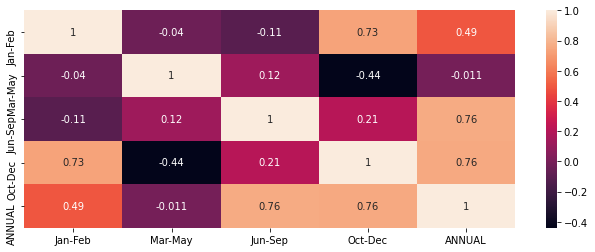

In [43]:
plt.figure(figsize=(11,4))
sns.heatmap(ap_data[['Jan-Feb','Mar-May','Jun-Sep','Oct-Dec','ANNUAL']].corr(),annot=True)
plt.show()

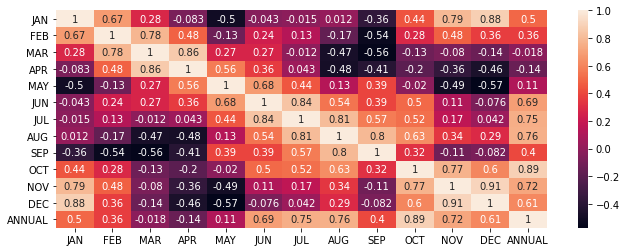

In [44]:
plt.figure(figsize=(11,4))
sns.heatmap(ap_data[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','ANNUAL']].corr(),annot=True)
plt.show()

## Observations
- It is observed that in **Tamil Nadu**, annual rainfall depends more in the months of october, december.
- It also shows that if there is rainfall in months march, april, may then there is less amount of rainfall in the months june, july, august, september.

## Predictions
- We used the same types of models and evaluation metrics used for the above dataset.
- We also tested the amount of rainfall in Chennai by models trained on complete dataset and Tamil Nadu dataset.

In [45]:
# testing and training for the complete data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

division_data = np.asarray(district[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']])

X = None; y = None
for i in range(division_data.shape[1]-3):
    if X is None:
        X = division_data[:, i:i+3]
        y = division_data[:, i+3]
    else:
        X = np.concatenate((X, division_data[:, i:i+3]), axis=0)
        y = np.concatenate((y, division_data[:, i+3]), axis=0)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
temp = district[['DISTRICT','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[district['STATE_UT_NAME'] == 'TAMIL NADU']
hyd = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[temp['DISTRICT'] == 'CHENNAI'])
# print temp
X_year = None; y_year = None
for i in range(hyd.shape[1]-3):
    if X_year is None:
        X_year = hyd[:, i:i+3]
        y_year = hyd[:, i+3]
    else:
        X_year = np.concatenate((X_year, hyd[:, i:i+3]), axis=0)
        y_year = np.concatenate((y_year, hyd[:, i+3]), axis=0)
 

In [52]:
from sklearn import linear_model

# linear model
reg = linear_model.ElasticNet(alpha=0.5)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print (mean_absolute_error(y_test, y_pred))

57.088623310112276


MEAN Chennai
142.7222222222222 152.78676594172742
Standard deviation Chennai
105.95566974266778 102.18402074449838


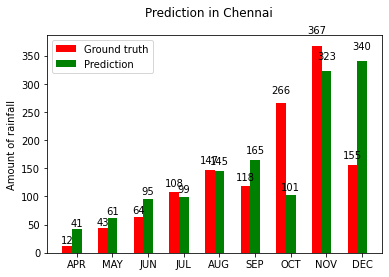

In [53]:
y_year_pred = reg.predict(X_year)
print ("MEAN Chennai")
print (np.mean(y_year),np.mean(y_year_pred))
print ("Standard deviation Chennai")
print (np.sqrt(np.var(y_year)),np.sqrt(np.var(y_year_pred)))

plot_graphs(y_year,y_year_pred,"Prediction in Chennai")

In [54]:
from sklearn.svm import SVR

# SVM model
clf = SVR(gamma='auto', C=0.1, epsilon=0.2)
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)
print (mean_absolute_error(y_test, y_pred))

116.60671510825178


MEAN Chennai
142.7222222222222 80.38046489611283
Standard deviation Chennai
105.95566974266778 0.08462065564625051


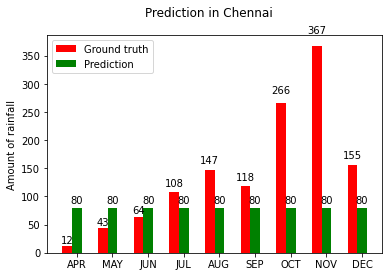

In [55]:
y_year_pred = clf.predict(X_year)
print ("MEAN Chennai")
print (np.mean(y_year),np.mean(y_year_pred))
print ("Standard deviation Chennai")
print (np.sqrt(np.var(y_year)),np.sqrt(np.var(y_year_pred)))

plot_graphs(y_year,y_year_pred,"Prediction in Chennai")


In [56]:
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.1, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

Epoch 1/10
65/65 [==============================] - 0s 7ms/step - loss: 7390.6992 - mae: 53.4305 - val_loss: 4072.6775 - val_mae: 41.7470
Epoch 2/10
65/65 [==============================] - 0s 6ms/step - loss: 5529.5054 - mae: 45.3617 - val_loss: 3938.2249 - val_mae: 38.3009
Epoch 3/10
65/65 [==============================] - 0s 7ms/step - loss: 5360.2007 - mae: 43.9517 - val_loss: 3767.1323 - val_mae: 38.7615
Epoch 4/10
65/65 [==============================] - 0s 6ms/step - loss: 5254.4287 - mae: 43.0121 - val_loss: 3742.6841 - val_mae: 38.4388
Epoch 5/10
65/65 [==============================] - 0s 6ms/step - loss: 5122.2476 - mae: 42.5053 - val_loss: 3576.8140 - val_mae: 37.5653
Epoch 6/10
65/65 [==============================] - 0s 6ms/step - loss: 4978.6309 - mae: 41.6770 - val_loss: 3731.4153 - val_mae: 37.2124
Epoch 7/10
65/65 [==============================] - 0s 7ms/step - loss: 5026.1348 - mae: 41.7692 - val_loss: 3701.6123 - val_mae: 38.5561
Epoch 8/10
65/65 [================

MEAN Chennai
142.7222222222222 118.24863
Standard deviation Chennai
105.95566974266778 74.03115


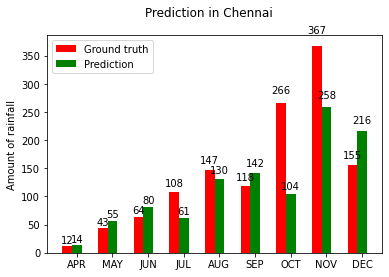

In [76]:
y_year_pred = model.predict(np.expand_dims(X_year, axis=2))
print ("MEAN Chennai")
print (np.mean(y_year),np.mean(y_year_pred))
print ("Standard deviation Chennai")
print (np.sqrt(np.var(y_year)),np.sqrt(np.var(y_year_pred)))


plot_graphs(y_year,y_year_pred.squeeze(),"Prediction in Chennai")

In [61]:
# training and testing sets for only andhra pradesh data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

division_data = np.asarray(ap_data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']])

X = None; y = None
for i in range(division_data.shape[1]-3):
    if X is None:
        X = division_data[:, i:i+3]
        y = division_data[:, i+3]
    else:
        X = np.concatenate((X, division_data[:, i:i+3]), axis=0)
        y = np.concatenate((y, division_data[:, i+3]), axis=0)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
from sklearn import linear_model

# linear model
reg = linear_model.ElasticNet(alpha=0.5)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print( mean_absolute_error(y_test, y_pred))

27.865268927141948


MEAN Chenai
142.7222222222222 129.6451254376152
Standard deviation Chennai
105.95566974266778 88.82641341499343


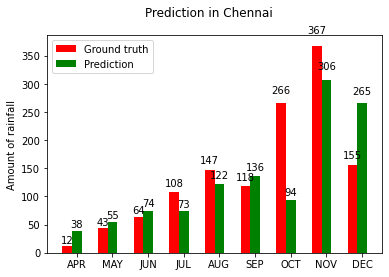

In [64]:
y_year_pred = reg.predict(X_year)
print ("MEAN Chenai")
print (np.mean(y_year),np.mean(y_year_pred))
print ("Standard deviation Chennai")
print (np.sqrt(np.var(y_year)),np.sqrt(np.var(y_year_pred)))
plot_graphs(y_year,y_year_pred,"Prediction in Chennai")

In [65]:
from sklearn.svm import SVR

# SVM model
clf = SVR(gamma='auto', C=0.1, epsilon=0.2)
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)
print (mean_absolute_error(y_test, y_pred))

44.10923434258851


MEAN Chennai
142.7222222222222 79.2215559475967
Standard deviation Chennai
105.95566974266778 0.09245102898525838


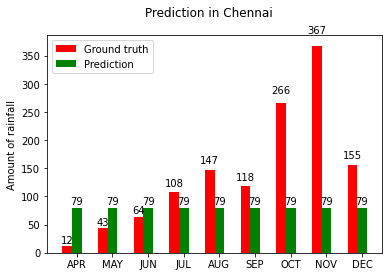

In [67]:
y_year_pred = clf.predict(X_year)
print ("MEAN Chennai")
print (np.mean(y_year),np.mean(y_year_pred))
print ("Standard deviation Chennai")
print (np.sqrt(np.var(y_year)),np.sqrt(np.var(y_year_pred)))
plot_graphs(y_year,y_year_pred,"Prediction in Chennai")


In [68]:
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.1, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print (mean_absolute_error(y_test, y_pred))

Epoch 1/10
4/4 [==============================] - 0s 50ms/step - loss: 3740.4377 - mae: 45.2769 - val_loss: 2583.0918 - val_mae: 40.5219
Epoch 2/10
4/4 [==============================] - 0s 27ms/step - loss: 3115.8965 - mae: 41.2997 - val_loss: 2686.6597 - val_mae: 37.6661
Epoch 3/10
4/4 [==============================] - 0s 27ms/step - loss: 2854.2625 - mae: 39.8482 - val_loss: 2732.3601 - val_mae: 36.7037
Epoch 4/10
4/4 [==============================] - 0s 25ms/step - loss: 2635.9673 - mae: 37.9189 - val_loss: 2321.4060 - val_mae: 34.3772
Epoch 5/10
4/4 [==============================] - 0s 26ms/step - loss: 2248.5120 - mae: 35.0301 - val_loss: 1995.4028 - val_mae: 35.4516
Epoch 6/10
4/4 [==============================] - 0s 26ms/step - loss: 2089.4009 - mae: 34.5797 - val_loss: 1933.0917 - val_mae: 36.2528
Epoch 7/10
4/4 [==============================] - 0s 25ms/step - loss: 2018.6860 - mae: 34.5337 - val_loss: 1855.9266 - val_mae: 34.8555
Epoch 8/10
4/4 [=========================

MEAN Chennai
142.7222222222222 118.24863
Standard deviation Chennai
105.95566974266778 74.03115


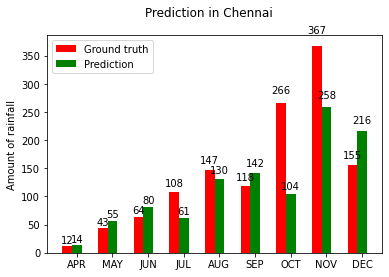

In [75]:
y_year_pred = model.predict(np.expand_dims(X_year, axis=2))
print ("MEAN Chennai")
print (np.mean(y_year),np.mean(y_year_pred))
print ("Standard deviation Chennai")
print (np.sqrt(np.var(y_year)),np.sqrt(np.var(y_year_pred)))
plot_graphs(y_year,y_year_pred.squeeze(),"Prediction in Chennai")


## Prediction Observations

### Training on complete dataset

|Algorithm| MAE|
|---------|----|
|Linear Regression| 57.08862331011236|
|SVR| 116.60671510825178|
|Artificial neural nets |44.329664907381066|

### Training on Chennai dataset

|Algorithm| MAE|
|---------|----|
|Linear Regression|27.865268927141948|
|SVR| 44.10923434258851|
|Artificial neural nets |22.430986207107022|


## Conclusions
- Various visualizations of data are observed which helps in implementing the approaches for prediction.
- Prediction of amount of rainfall for both the types of dataset.
- Observations indicates machine learning models won't work well for prediction of rainfall due to fluctutaions in rainfall.